In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Numerical Solution of Heat Equation 1D

In [2]:
length = 10
k = 0.89
# Boundary Conditions
temp_left = 100
temp_right = 200
total_sim_time = 25

In [3]:
dx = 0.1
x_vector = np.linspace(0, length, int(length / dx))

In [4]:
dt = 0.0001
t_vector = np.linspace(0, total_sim_time, int(total_sim_time / dt))

In [5]:
# Initial Conditions
u = np.zeros([t_vector.shape[0], x_vector.shape[0]])
u.shape

(250000, 100)

In [6]:
u[:, 0] = temp_left
u[:, -1] = temp_right

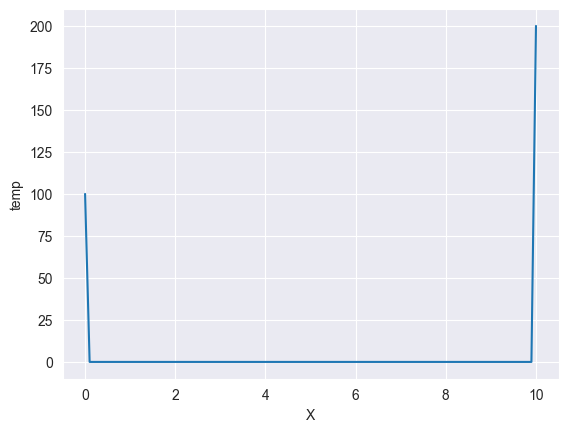

In [7]:
plt.plot(x_vector, u[0])
plt.ylabel("temp")
plt.xlabel("X")
plt.show()

In [8]:
for t in range(1, len(t_vector) - 1):
    for x in range(1, len(x_vector) - 1):
        u[t + 1, x] = (k * (dt / (dx ** 2)) * (u[t, x + 1] - 2 * u[t, x] + u[t, x - 1])) + u[t, x]

In [9]:
len(u)

250000

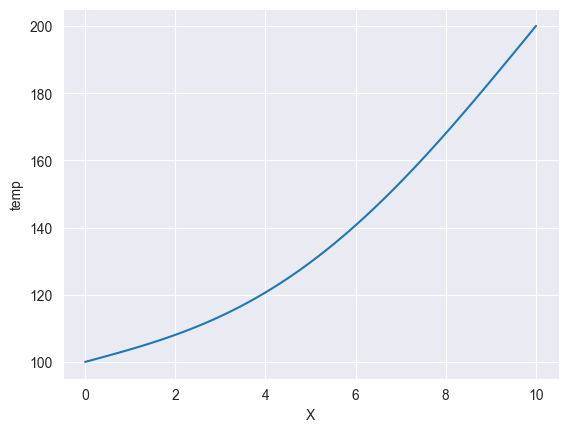

In [10]:
plt.plot(x_vector, u[249999])
plt.ylabel("temp")
plt.xlabel("X")
plt.show()

## Numerical Solution of Diffusion 2D 

In [11]:
import seaborn as sns

In [12]:
nt = 500
nx = 51
ny = 51

nu = 0.1
dt = 0.001

dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

In [13]:
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

In [14]:
comb = np.zeros((ny, nx))

In [15]:
u = np.zeros((nx, ny))
v = np.zeros((ny, nx))

un = np.zeros((ny, nx))
vn = np.zeros((ny, nx))

uf = np.zeros((nt, ny, nx))
vf = np.zeros((nt, ny, nx))

In [16]:
u = np.ones((nx, ny))
v = np.ones((ny, nx))
uf = np.ones((nt, ny, nx))
vf = np.ones((nt, ny, nx))

u[int(0.75 / dy):int(1.25 / dy + 1), int(0.75 / dy):int(1.25 / dy + 1)] = 5
v[int(0.75 / dy):int(1.25 / dy + 1), int(0.75 / dy):int(1.25 / dy + 1)] = 5

uf[0, int(0.75 / dy):int(1.25 / dy + 1), int(0.75 / dy):int(1.25 / dy + 1)] = 5
vf[0, int(0.75 / dy):int(1.25 / dy + 1), int(0.75 / dy):int(1.25 / dy + 1)] = 5

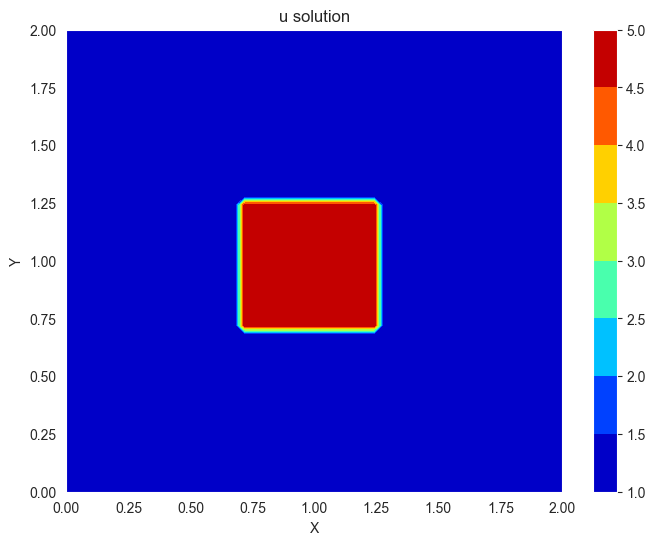

In [17]:
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, u[:], cmap="jet")
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
contour.set_label("u scale")

In [18]:
for n in range(1, nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j] = (un[i, j] - (un[i, j] * dt / dx * (un[i, j] - un[i - 1, j])) - vn[i, j] * dt / dy * (
                    un[i, j] - un[i, j - 1])) + (nu * dt / (dx ** 2)) * (
                              un[i + 1, j] - 2 * un[i, j] + un[i - 1, j]) + (nu * dt / (dx ** 2)) * (
                              un[i, j - 1] - 2 * un[i, j] + un[i, j + 1])
            v[i, j] = (vn[i, j] - (un[i, j] * dt / dx * (vn[i, j] - vn[i - 1, j])) - vn[i, j] * dt / dy * (
                    vn[i, j] - vn[i, j - 1])) + (nu * dt / (dx ** 2)) * (
                              vn[i + 1, j] - 2 * vn[i, j] + vn[i - 1, j,]) + (nu * dt / (dx ** 2)) * (
                              vn[i, j - 1] - 2 * vn[i, j] + vn[i, j + 1])
            uf[n, i, j] = u[i, j]
            vf[n, i, j] = v[i, j]

    u[:, 0] = 1
    u[:, -1] = 1
    u[0, :] = 1
    u[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1
    v[0, :] = 1
    v[-1, :] = 1

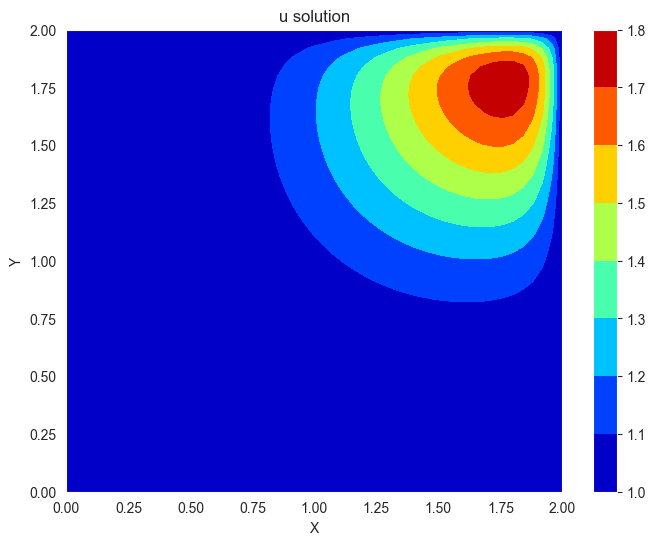

In [19]:
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, u[:], cmap="jet")
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
contour.set_label("u scale")

## Solve Symbolic 

In [20]:
u = sp.symbols("u", cls=sp.Function)
x, t = sp.symbols("x, t")
k = 0.98

In [21]:
pde = sp.Eq(k * sp.diff(u(x, t), x, x), sp.diff(u(x, t), t))
pde

Eq(0.98*Derivative(u(x, t), (x, 2)), Derivative(u(x, t), t))

In [22]:
# sp.pdsolve(pde, u(x, t))

In [23]:
# Define the symbols and functions
x, t, lambda_ = sp.symbols('x t lambda_')
u = sp.Function('u')(x, t)
X = sp.Function('X')(x)
T = sp.Function('T')(t)
k = 0.98

# Define the PDE
pde = sp.Eq(k * sp.diff(u, x, x), sp.diff(u, t))

# Assume a solution u(x, t) = X(x) * T(t)
u_separated = X * T
pde_separated = pde.subs(u, u_separated).doit()

# Separate variables
lhs = pde_separated.lhs / (k * u_separated)
rhs = pde_separated.rhs / u_separated
separated_eq = sp.Eq(lhs, rhs)

# Both sides must equal a constant (negative for separation of variables)
separation_constant = -lambda_

# Solve ODE for X(x)
X_ode = sp.Eq(sp.diff(X, x, x) + lambda_ * X, 0)
X_sol = sp.dsolve(X_ode, X)

# Solve ODE for T(t)
T_ode = sp.Eq(sp.diff(T, t) + lambda_ * k * T, 0)
T_sol = sp.dsolve(T_ode, T)

X_sol


Eq(X(x), C1*exp(-x*sqrt(-lambda_)) + C2*exp(x*sqrt(-lambda_)))

In [24]:
T_sol

Eq(T(t), C1*exp(-0.98*lambda_*t))

## PINN Heat equation

## PINN Burgers Equation

In [81]:
import torch
import numpy as np
import seaborn as sb
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
import math

In [62]:
class Burgers_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 32)
        self.layer2 = nn.Linear(32, 32)
        self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.net = torch.nn.Sequential(
            nn.Linear(2,20),
            nn.Tanh(),
            nn.Linear(20,30),
            nn.Tanh(),
            nn.Linear(30,30),
            nn.Tanh(),
            nn.Linear(30,20),
            nn.Tanh(),
            nn.Linear(20,20),
            nn.Tanh(),
            nn.Linear(20,1)
        )
    
    def forward(self, x):
        out12 = self.relu(self.layer1(x))
        out23 = self.relu(self.layer2(out12))
        out34 = self.relu(self.layer3(out23))
        out = self.layer4(out34)
        return self.net(x)

In [63]:
class Net:
    def __init__(self):
        device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        
        self.model = Burgers_network().to(device)
        
        # comp. domain 
        self.x_step = 0.1
        self.t_step = 0.1
        x = torch.arange(-1,1+self.x_step, self.x_step)
        t = torch.arange(0,1+self.t_step, self.t_step)
        
        self.X = torch.stack(torch.meshgrid(x,t)).reshape(2,-1).T
        
        # train data
        bc1 = torch.stack(torch.meshgrid(x[0],t)).reshape(2,-1).T
        bc2 = torch.stack(torch.meshgrid(x[-1],t)).reshape(2,-1).T
        ic  = torch.stack(torch.meshgrid(x,t[0])).reshape(2,-1).T
        self.X_train = torch.cat([bc1, bc2, ic])
        
        y_bc1 = torch.zeros(len(bc1))
        y_bc2 = torch.zeros(len(bc2))
        y_ic  = -torch.sin(math.pi * ic[:,0])
        self.y_train = torch.cat([y_bc1, y_bc2, y_ic])
        self.y_train = self.y_train.unsqueeze(1)
        
        self.X = self.X.to(device)
        self.y_train = self.y_train.to(device)
        self.X_train = self.X_train.to(device)
        self.X.requires_grad = True
        
        # optimizer setting
        self.adam =  torch.optim.Adam(self.model.parameters())
        #Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS)
        self.optimizer = torch.optim.LBFGS(
            self.model.parameters(),    
            lr=1.0,
            max_iter = 50000,
            max_eval = 50000,
            history_size = 50,
            tolerance_grad = 1e-7,
            tolerance_change = 1.0* np.finfo(float).eps,
            line_search_fn ="strong_wolfe"
        )
        
        self.criterion = torch.nn.MSELoss()
        self.iter = 1
    
    def loss_func(self):
        self.adam.zero_grad()
        self.optimizer.zero_grad()
        
        y_pred = self.model(self.X_train)
        loss_data = self.criterion(y_pred,self.y_train)
        
        u = self.model(self.X)
        
        du_dX = torch.autograd.grad(
            u,
            self.X,
            grad_outputs = torch.ones_like(u),
            create_graph = True,
            retain_graph = True
        )[0]
        
        du_dt = du_dX[:,1]
        du_dx = du_dX[:,0]
        
        du_dXX = torch.autograd.grad(
            du_dX,
            self.X,
            grad_outputs = torch.ones_like(du_dX),
            create_graph = True,
            retain_graph = True
        )[0]
        
        du_dxx = du_dXX[:,0]
        
        loss_pde = self.criterion(du_dt + u.squeeze()*du_dx , (0.01/math.pi) * du_dxx)
        
        loss = loss_pde + loss_data
        loss.backward()
        
        if self.iter % 100 == 0:
            print(self.iter, loss.item())
        self.iter = self.iter+1
        
        return loss
    
    def train(self):
        self.model.train()
        for i in range(1000):
            self.adam.step(self.loss_func)
        self.optimizer.step(self.loss_func)
    
    def eval_(self):
        self.model.eval()

In [64]:
net = Net()
net.train()

100 0.1675456464290619
200 0.09508785605430603
300 0.08507481217384338
400 0.0790524035692215
500 0.07295078784227371
600 0.06649791449308395
700 0.05048956722021103
800 0.03228551149368286
900 0.02647252008318901
1000 0.021343711763620377
1100 0.011133707128465176
1200 0.005631659179925919
1300 0.003202562453225255
1400 0.0015207910910248756
1500 0.001177728408947587
1600 0.0009492723038420081
1700 0.0006907203933224082
1800 0.0005266041262075305
1900 0.0004110162262804806
2000 0.00033755734330043197
2100 0.0002982678124681115
2200 0.00024745718110352755
2300 0.00021083795581944287
2400 0.00018501991871744394
2500 0.0001609880564501509
2600 0.00015081901801750064
2700 0.00013282477448228747
2800 0.000116593626444228
2900 0.00010575510532362387
3000 9.73695787251927e-05
3100 9.22477338463068e-05
3200 8.236915891757235e-05
3300 7.655924127902836e-05
3400 6.930985546205193e-05
3500 6.304596172412857e-05
3600 5.8806130255106837e-05
3700 5.2658891945611686e-05
3800 4.776192145072855e-05
39

In [65]:
net.model.eval()

Burgers_network(
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (net): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=30, bias=True)
    (3): Tanh()
    (4): Linear(in_features=30, out_features=30, bias=True)
    (5): Tanh()
    (6): Linear(in_features=30, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=20, bias=True)
    (9): Tanh()
    (10): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [70]:
h = 0.01
k = 0.01

x = torch.arange(-1,1,h)
t = torch.arange(0,1,k)

X= torch.stack(torch.meshgrid(x,t)).reshape(2,-1).T
X= X.to(net.X.device)

In [71]:
X, X.shape

(tensor([[-1.0000,  0.0000],
         [-1.0000,  0.0100],
         [-1.0000,  0.0200],
         ...,
         [ 0.9900,  0.9700],
         [ 0.9900,  0.9800],
         [ 0.9900,  0.9900]]),
 torch.Size([20000, 2]))

In [72]:
model = net.model
model.eval()
with torch.no_grad():
    y_pred = model(X)
    y_pred = y_pred.reshape(len(x),len(t)).cpu().numpy()

In [73]:
y_pred.shape

(200, 100)

In [80]:
sns.set_style("white")
plt.figure(figsize=(5,3), dpi=3000)
sns.heatmap(y_pred, cmap='jet')

<Axes: >

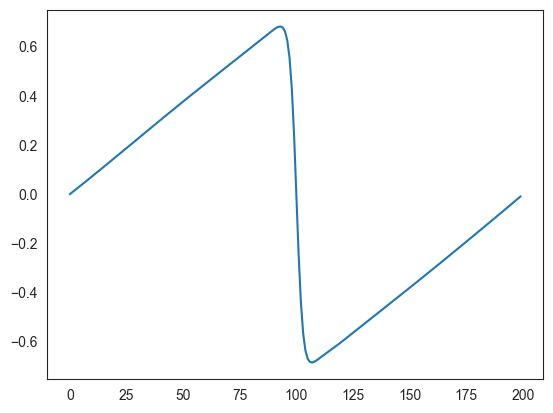

In [79]:
plt.plot(y_pred[:,-1])